# Google Reviews Classification - Natural Language Processing

In this NLP project you will be attempting to classify Google Reviews into 1 star or 5 star categories based off the text content in the reviews. 

Each observation in this dataset is a review of a business by a user. The stars column is the number of stars assigned by the reviewer to the business. The cool column is the number of "cool" mentions this review received and the useful and funny columns follow this structure. This is gathered review data and does not have the actual business information

## Imports

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
import nltk
from nltk.corpus import stopwords
%matplotlib inline

## Load Data and check basic Information about the data

In [10]:
reviews = pd.read_csv('google.csv')

In [11]:
reviews.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [12]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  10000 non-null  object
 1   date         10000 non-null  object
 2   review_id    10000 non-null  object
 3   stars        10000 non-null  int64 
 4   text         10000 non-null  object
 5   type         10000 non-null  object
 6   user_id      10000 non-null  object
 7   cool         10000 non-null  int64 
 8   useful       10000 non-null  int64 
 9   funny        10000 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 781.4+ KB


In [13]:
reviews.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


**Adding a new column that is the number of words in the text column.**

In [14]:
reviews['review length'] = reviews['text'].apply(len)

## Data Visualizations
Now I will look at some visualizations that should give a good overview of the data like review length, star count, avg. star per category, correlation and heatmap

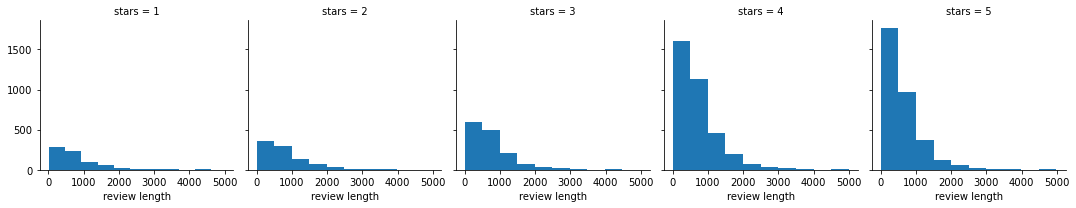

In [15]:
grid = sns.FacetGrid(data=reviews,col='stars')
grid.map(plt.hist,'review length')

In [ ]:
star = reviews.groupby('stars').mean()
star

In [ ]:
star.corr()

In [ ]:
sns.heatmap(star.corr(),annot=True)

## NLP Classification Task

**Grab reviews that were either 1 star or 5 stars.**

In [ ]:
review_class = reviews[(reviews.stars == 1) | (reviews.stars == 5)]

**Create two objects X and y. X will be the 'text' column of yelp_class and y will be the 'stars' column of yelp_class**

In [ ]:
X = review_class['text']
y = review_class['stars']

**Importing CountVectorizer and creating vector object to vectorize the data**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [ ]:
X = cv.fit_transform(X)

## Train Test Split

Let's split the data into training and testing data.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=101)

## Training a Model

In [ ]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

**Now fit nb using the training data.**

In [ ]:
nb.fit(X_train,y_train)

## Predictions and Evaluations

In [ ]:
predictions = nb.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report

In [51]:
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[159  69]
 [ 22 976]]


              precision    recall  f1-score   support

           1       0.88      0.70      0.78       228
           5       0.93      0.98      0.96       998

    accuracy                           0.93      1226
   macro avg       0.91      0.84      0.87      1226
weighted avg       0.92      0.93      0.92      1226



**The model has a 93% accuracy, we can use this to decipher between review that fall into a 5 star or 1 star category.**